# CAPSTONE PROJECT-4 :- PRCP-1020-House Price Prediction

# Project Team ID :  PTID-CDS-FEB-24-1799

# Business Case:-To predict the house  prices based on given  data

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:-a) Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.      
            b) Determine the relationship between the house features and how the price varies based on this.

Task3:- Come up with suggestions for the customer to buy the house according to the area, price and other requirements.


# Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# load data

In [2]:
data=pd.read_csv("data.csv")
pd.set_option("display.max_columns",None)
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

# Domain analysis

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heatig
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
*  GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


# basic checks

In [3]:
data.shape

(1460, 81)

In [4]:
data.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [5]:
data.describe(include='O').T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [9]:
data.ScreenPorch.value_counts()

0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64

In [10]:
data.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

## Exploratory Data Analysis

In [11]:
# checking for percentage of missing values
missing_value=[x for x in data.columns if data[x].isnull().sum()>1]
for i in missing_value:
    print(i,np.round(data[i].isnull().mean(),4),"% missing values")

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


### since there are many missing values we need to find its relationship with the saleprice

## univariate analysis

In [12]:
#!pip install sweetviz
#import sweetviz as sv
#my_report=sv.analyze(data)
#my_report.show_html()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

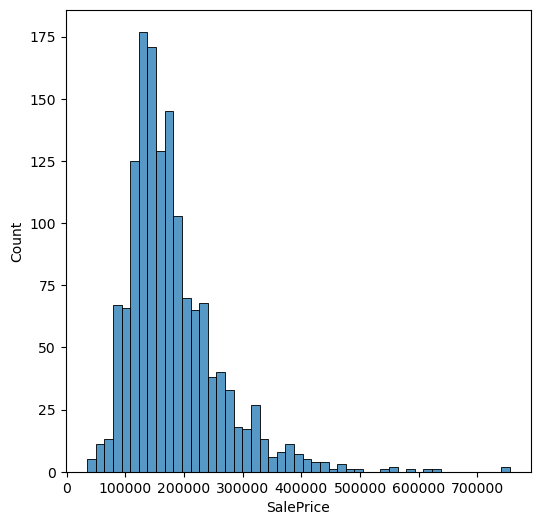

In [13]:
plt.figure(figsize=(6,6))
sns.histplot(x=data.SalePrice)

## bivariate analysis

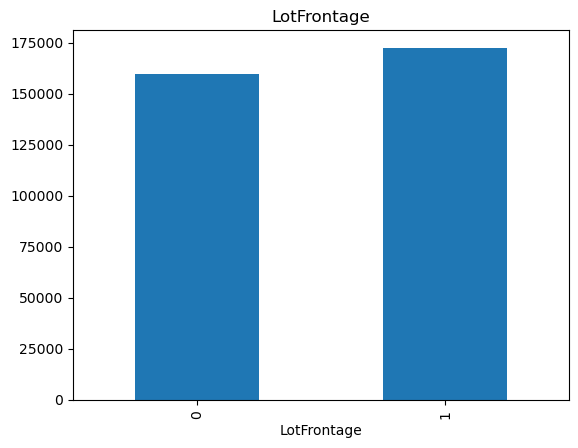

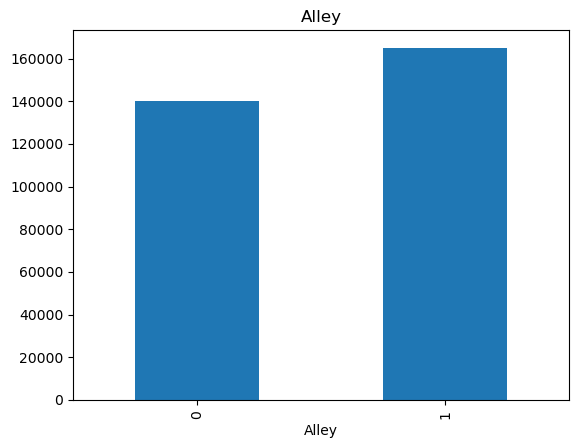

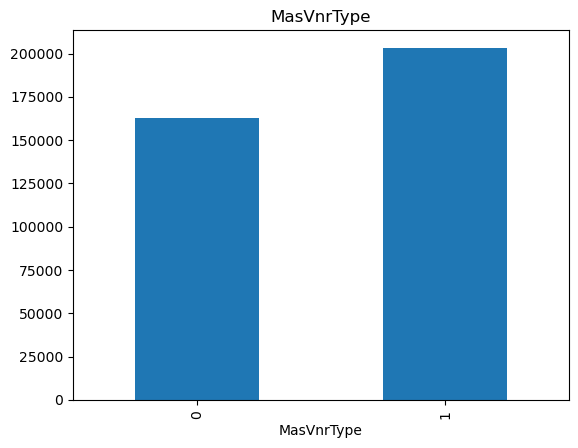

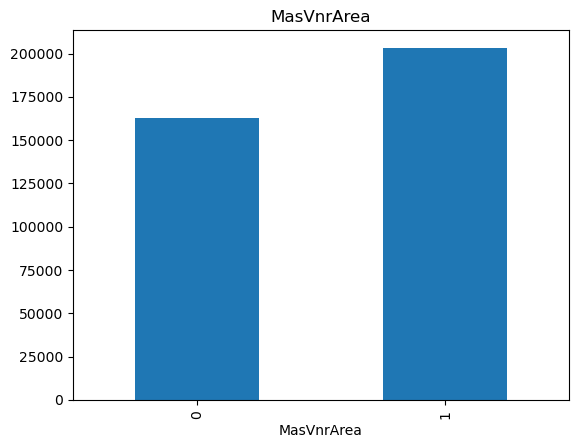

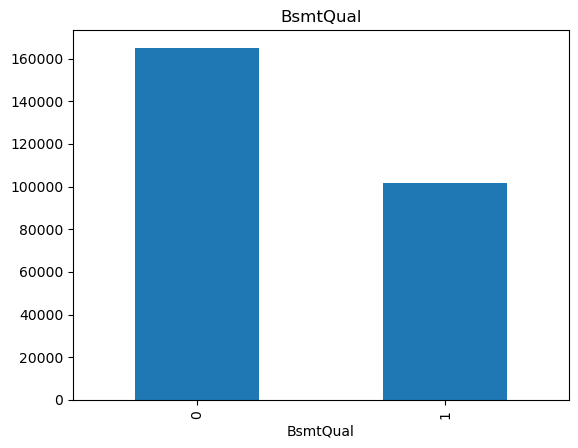

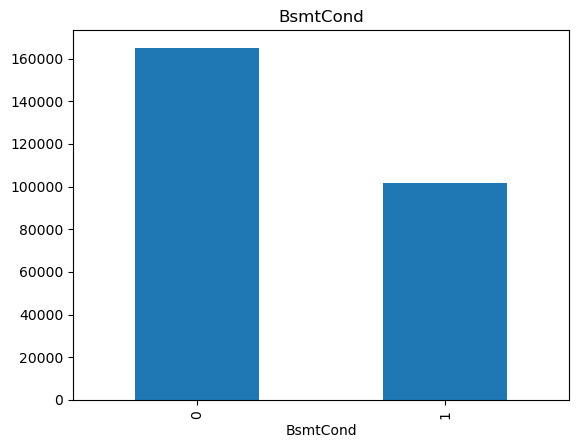

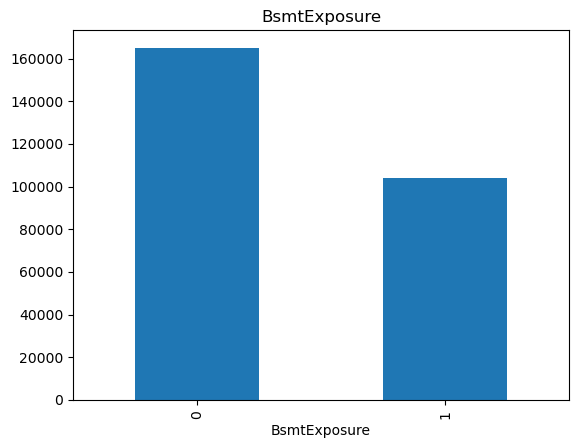

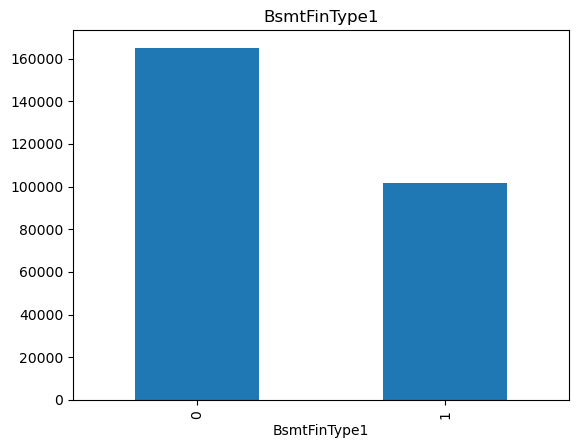

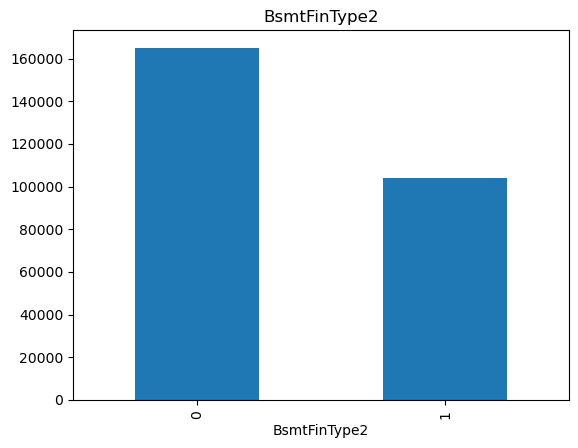

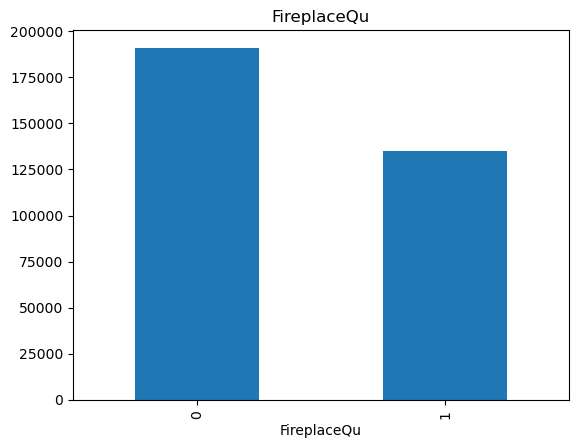

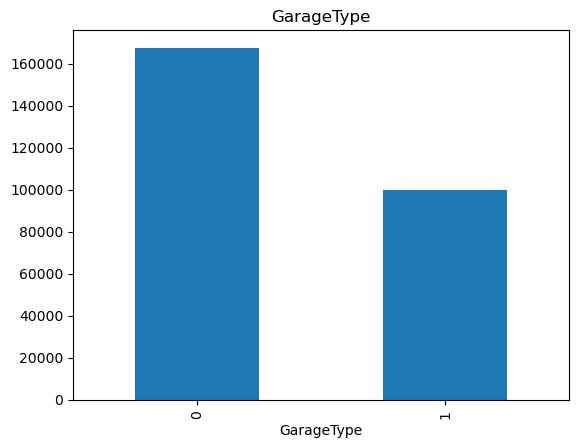

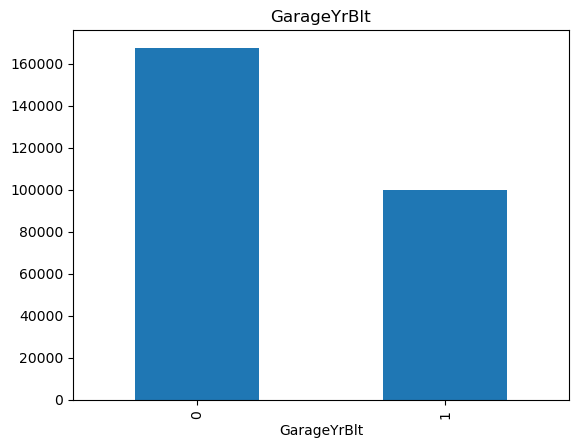

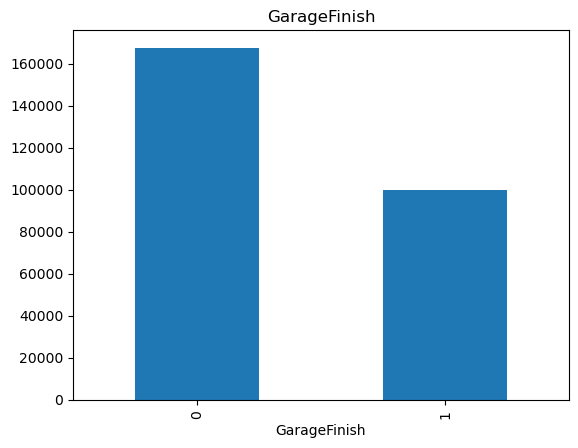

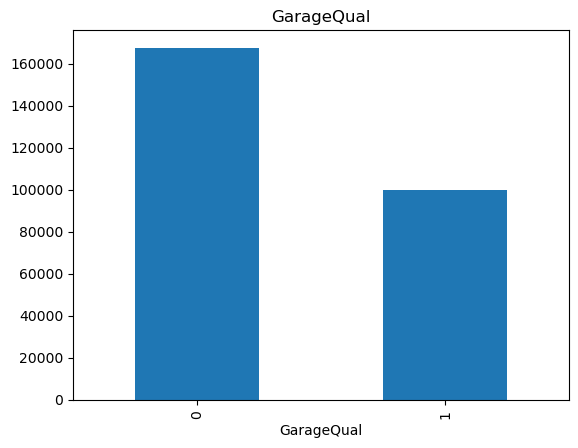

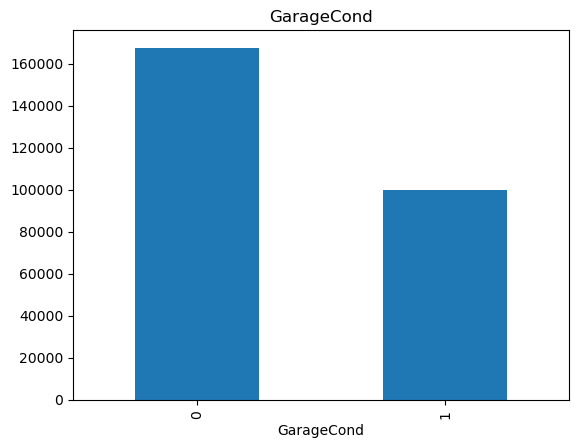

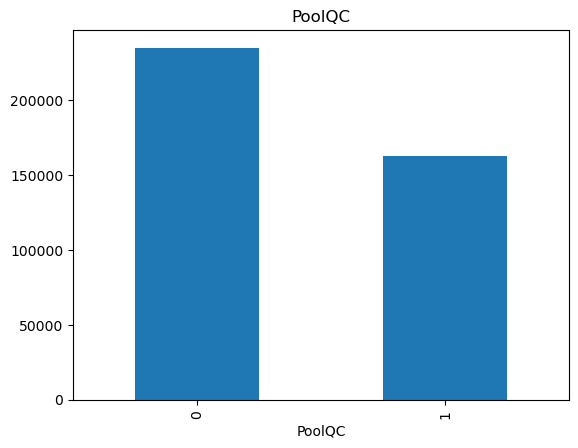

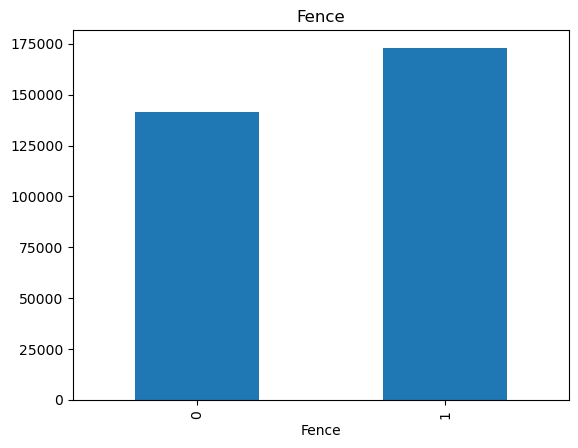

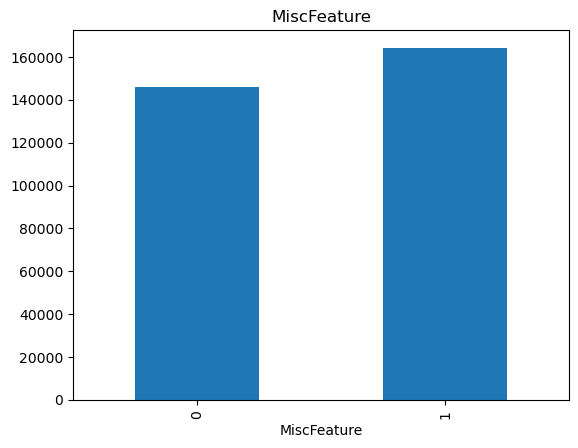

In [14]:
# plotting graph

for i in missing_value:
    df1=data.copy()
    df1[i]=np.where(data[i].isnull(),1,0)
    df1.groupby(i)['SalePrice'].median().plot.bar()
    plt.title(i)
    plt.show()

#### we can see clear relationship between missing values with dependent variable , therefore need to impute 

### relation between GrLivArea and SalePrice

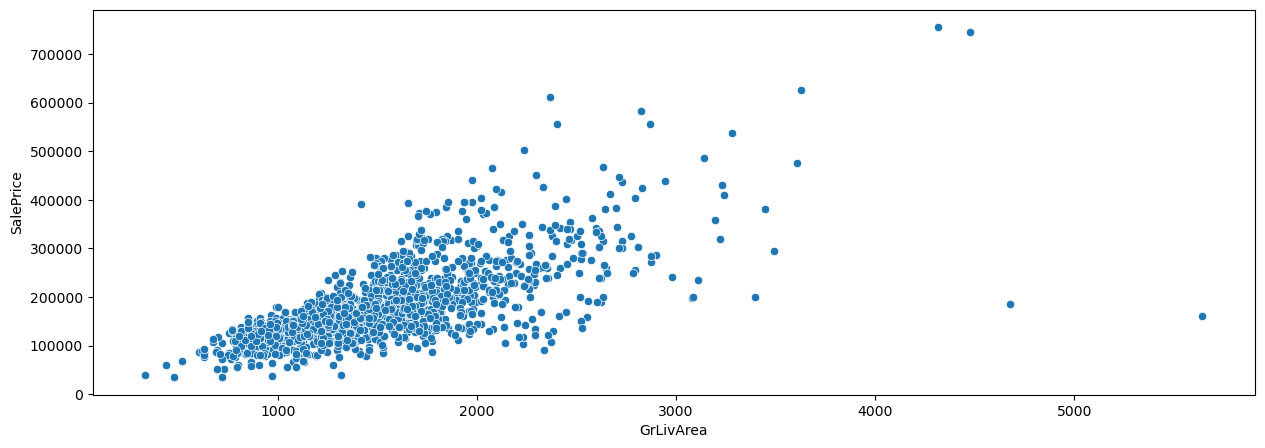

In [15]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=data['GrLivArea'],y=data.SalePrice)
plt.show()

**there is a positive relation between GrLivArea and Sale price. When GrLivArea increases saleprice also increases and there are few outliers**

### relation between GarageArea and SalePrice

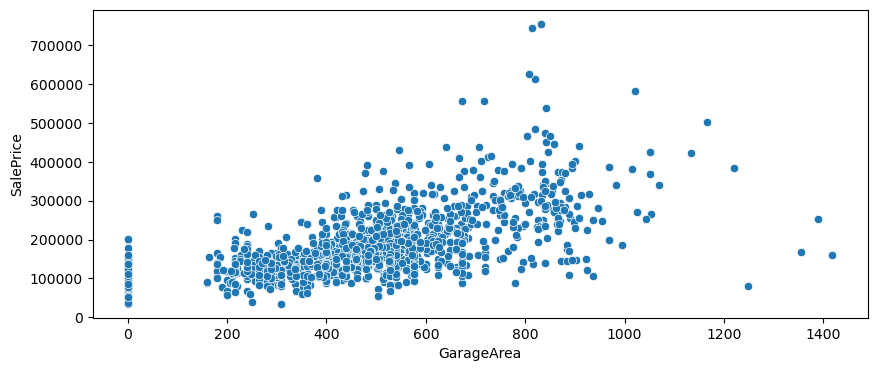

In [16]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=data['GarageArea'],y=data.SalePrice)
plt.show()

**There is a positive relationship between GarageArea and SalePrice** 

### relation between TotalBsmtSF and SalePrice

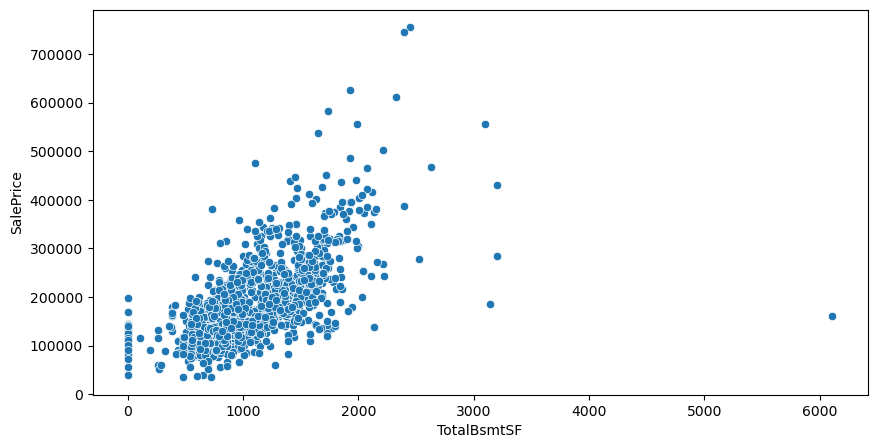

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=data['TotalBsmtSF'],y=data.SalePrice)
plt.show()

**TotalBsmtSF is highly correlated with SalePrice**

### relation between OverallQual and SalePrice

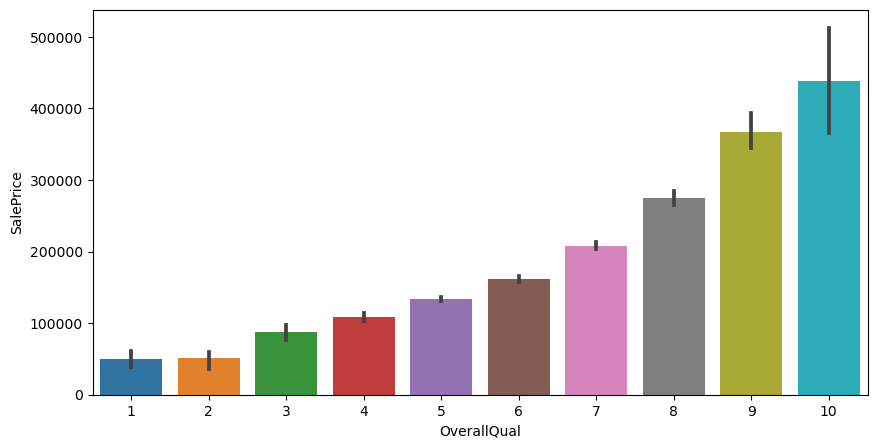

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=data.OverallQual ,y=data['SalePrice'])
plt.show()

### relation between Neighborhood and SalePrice

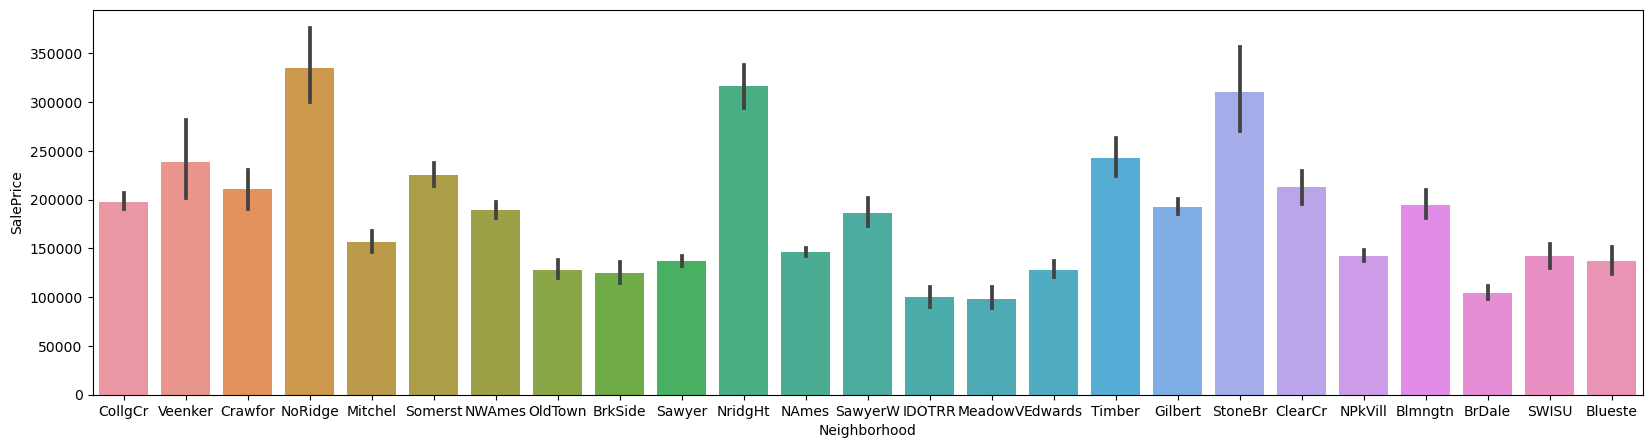

In [19]:
plt.figure(figsize=(20,5))
sns.barplot(x=data.Neighborhood ,y=data['SalePrice'])
plt.show()

### relation between GarageCars and SalePrice

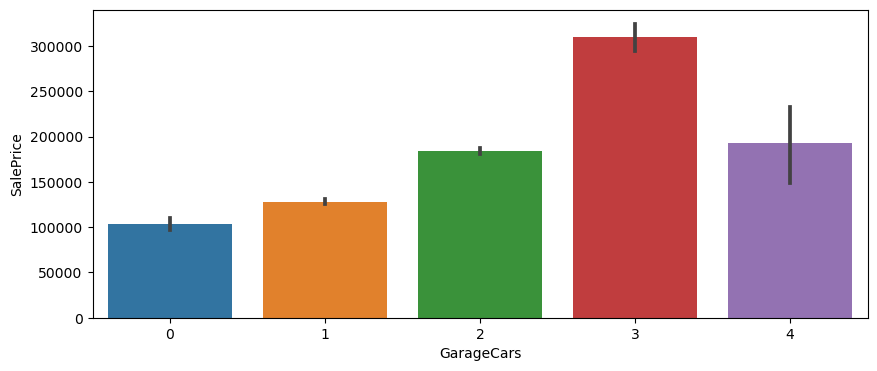

In [20]:
plt.figure(figsize=(10,4))
sns.barplot(x=data.GarageCars ,y=data['SalePrice'])
plt.show()

### relation between ExterQual and SalePrice

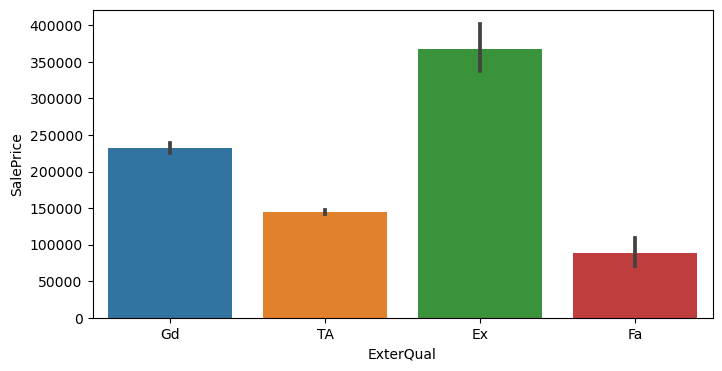

In [21]:
plt.figure(figsize=(8,4))
sns.barplot(x=data.ExterQual ,y=data['SalePrice'])
plt.show()

### relationship between BsmtQual and Saleprice

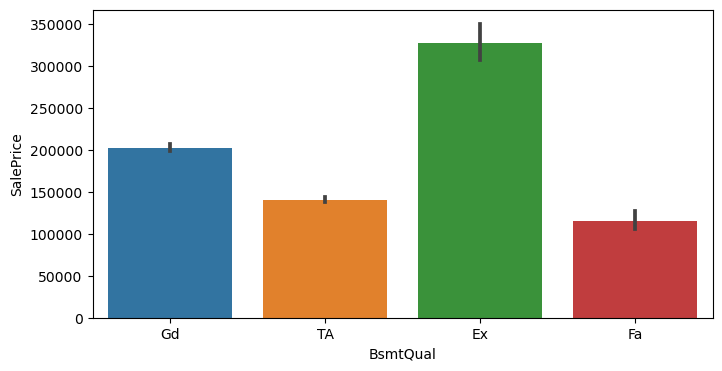

In [22]:
plt.figure(figsize=(8,4))
sns.barplot(x=data.BsmtQual ,y=data['SalePrice'])
plt.show()

 ### relationship between KitchenQual and Saleprice

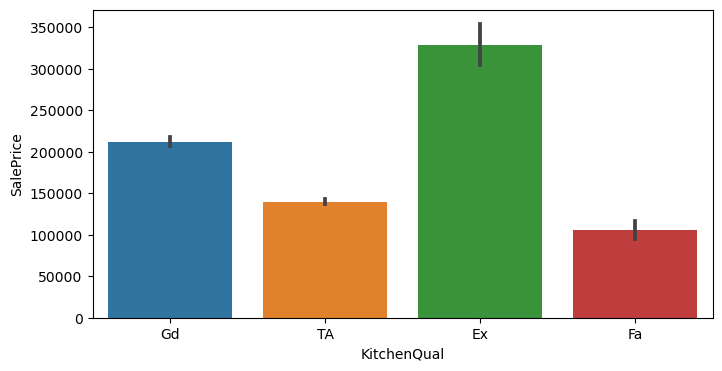

In [23]:
plt.figure(figsize=(8,4))
sns.barplot(x=data.KitchenQual ,y=data['SalePrice'])
plt.show()

### multivariate analysis

In [24]:

#sns.pairplot(data)

## Preprocessing 

### Handling missing values

In [25]:
data[data.columns[data.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [26]:
impute_by_none=data.loc[:,['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']]
for i in impute_by_none.columns:
    data[i].fillna('None',inplace=True)

In [27]:
# imputing categorical variables
imputing_categorical=data.loc[:,['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond']]
for i in imputing_categorical.columns:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [28]:
data[data.columns[data.isnull().any()]].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [29]:
# imputing numerical variables
impute_by_median=data.loc[:,['LotFrontage','MasVnrArea','GarageYrBlt']]
for i in impute_by_median:
    data[i].fillna(data[i].median(),inplace=True)

In [30]:
data[data.columns[data.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [31]:
#dropping unique columns
data.drop('Id',axis=1,inplace=True)

### Handling datetime variables

The features YearBuilt, YearRemodAdd , GarageYrBuilt are temporal variables .

In [32]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    
    data[feature]=data['YrSold']-data[feature]

In [33]:
data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

### Handling categorical data

In [34]:
pd.set_option("display.max_columns",None)
data.head(1)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd          5.0          RFn           2         548         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0   None  None        None        0       2    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500

### Manual encoding 

**The features like ExternalQual,EXterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,
BsmtFinType2,Heatingqc,kitchenqual,fireplacequal,GarageQual,GarageCondition,Poolqc,fence have ordinal values.**

In [35]:
data.Fence.value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [36]:
data['ExterQual'].replace(to_replace=['Fa','TA','Gd','Ex'],value=[0,1,2,3],inplace=True)

In [37]:
data['ExterCond'].replace(to_replace=['Po','Fa','TA','Gd','Ex'],value=[0,1,2,3,4],inplace=True)

In [38]:
data['BsmtQual'].replace(to_replace=['Fa','TA','Gd','Ex'],value=[0,1,2,3],inplace=True)

In [39]:
data['BsmtCond'].replace(to_replace=['Po','Fa','TA','Gd'],value=[0,1,2,3],inplace=True)

In [40]:
data['BsmtExposure'].replace(to_replace=['No','Mn','Av','Gd'],value=[0,1,2,3],inplace=True)

In [41]:
data['BsmtFinType1'].replace(to_replace=['Unf','LwQ','Rec','BLQ','ALQ','GLQ'],value=[0,1,2,3,4,5],inplace=True)

In [42]:
data['BsmtFinType2'].replace(to_replace=['Unf','LwQ','Rec','BLQ','ALQ','GLQ'],value=[0,1,2,3,4,5],inplace=True)

In [43]:
data['HeatingQC'].replace(to_replace=['Po','Fa','TA','Gd','Ex'],value=[0,1,2,3,4],inplace=True)

In [44]:
data['KitchenQual'].replace(to_replace=['Fa','TA','Gd','Ex'],value=[0,1,2,3],inplace=True)

In [45]:
data['FireplaceQu'].replace(to_replace=['None','Po','Fa','TA','Gd','Ex'],value=[0,1,2,3,4,5],inplace=True)

In [46]:
data['GarageQual'].replace(to_replace=['Po','Fa','TA','Gd','Ex'],value=[0,1,2,3,4],inplace=True)

In [47]:
data['GarageCond'].replace(to_replace=['Po','Fa','TA','Gd','Ex'],value=[0,1,2,3,4],inplace=True)

In [48]:
data['PoolQC'].replace(to_replace=['None','Fa','Gd','Ex'],value=[0,1,2,3],inplace=True)

In [49]:
data['Fence'].replace(to_replace=['None','MnWw','GdWo','MnPrv','GdPrv'],value=[0,1,2,3,4],inplace=True)

### label Encoding

In [50]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']

In [51]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [53]:
 for x in categorical_features:
        data[x]=le.fit_transform(data[x])

In [54]:
data.Heating.value_counts()

1    1428
2      18
3       7
5       4
4       2
0       1
Name: Heating, dtype: int64

### Handling Outliers

In [55]:
for i in data.columns:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    outlier=data[(data[i]<lower)|(data[i]>upper)]
    per=(len(outlier)/len(data))*100
    print("percentage of "+ i+" is: ",per)

percentage of MSSubClass is:  7.054794520547945
percentage of MSZoning is:  21.164383561643834
percentage of LotFrontage is:  7.260273972602739
percentage of LotArea is:  4.726027397260274
percentage of Street is:  0.410958904109589
percentage of Alley is:  6.232876712328768
percentage of LotShape is:  0.0
percentage of LandContour is:  10.205479452054794
percentage of Utilities is:  0.0684931506849315
percentage of LotConfig is:  0.0
percentage of LandSlope is:  5.342465753424658
percentage of Neighborhood is:  0.0
percentage of Condition1 is:  13.698630136986301
percentage of Condition2 is:  1.0273972602739725
percentage of BldgType is:  16.43835616438356
percentage of HouseStyle is:  0.0
percentage of OverallQual is:  0.136986301369863
percentage of OverallCond is:  8.561643835616438
percentage of YearBuilt is:  0.547945205479452
percentage of YearRemodAdd is:  0.0
percentage of RoofStyle is:  21.84931506849315
percentage of RoofMatl is:  1.7808219178082192
percentage of Exterior1st

In [56]:
cols=data[['LotArea','OverallQual','YearBuilt','Exterior1st','Exterior2nd','Foundation','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF']]

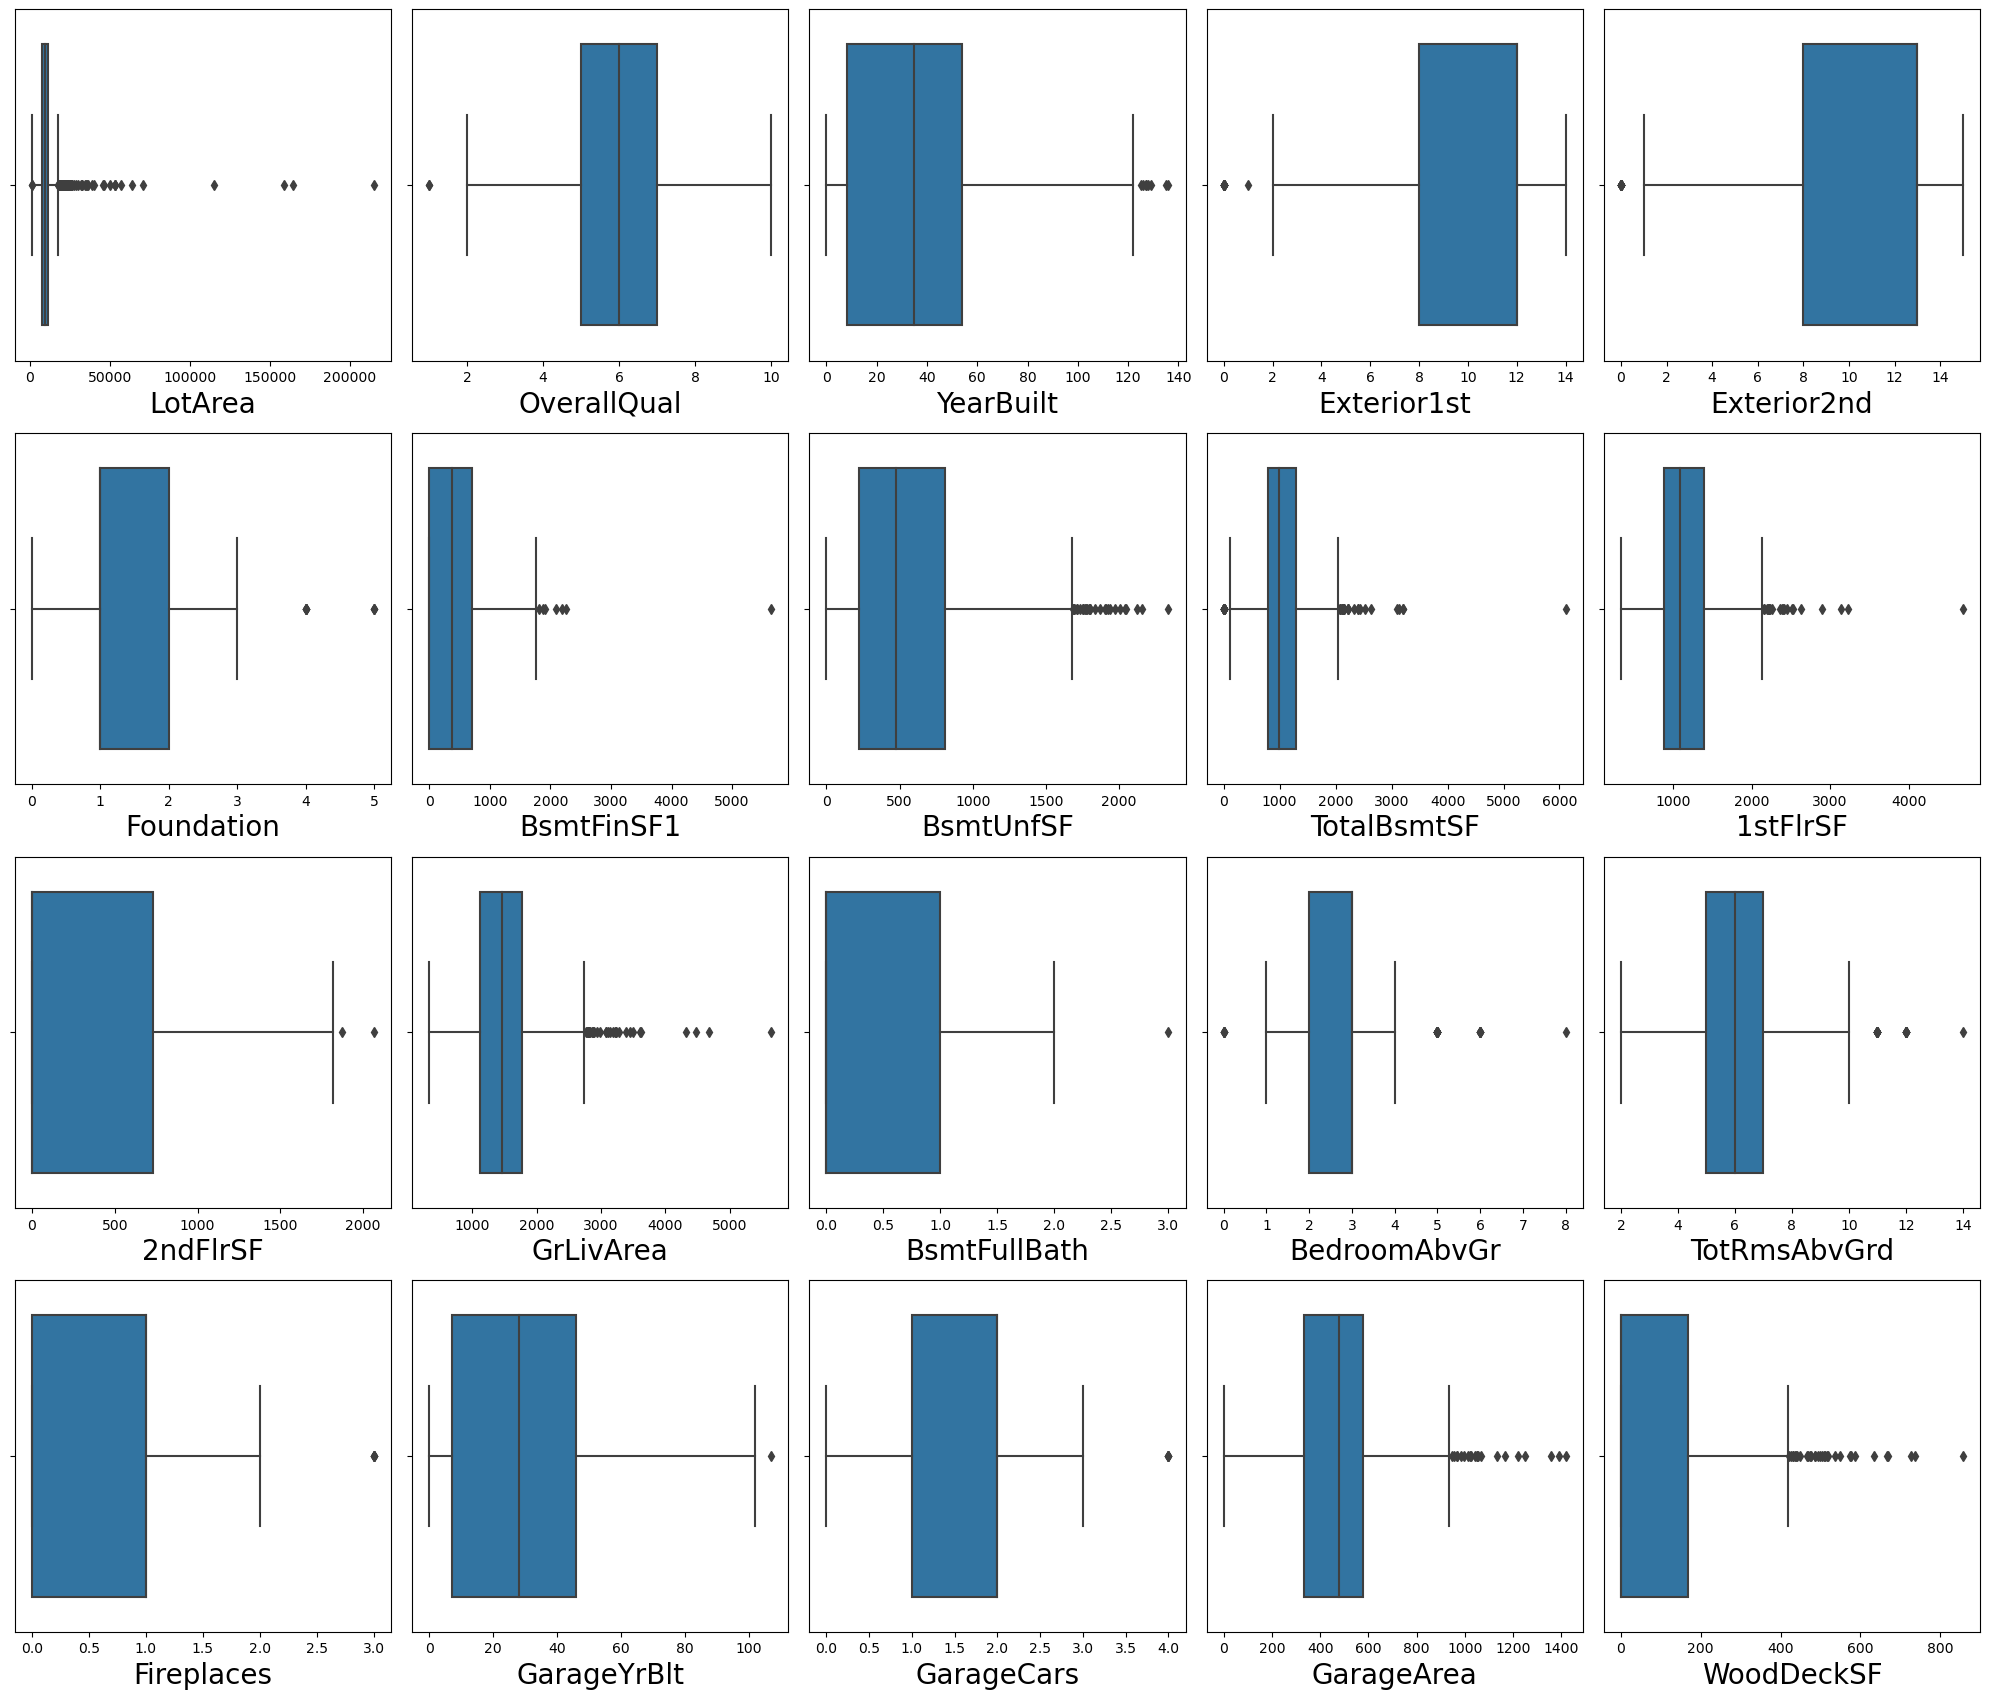

In [57]:
plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in cols: # iteration of columns / acessing the columns from  dataset
    if plotno<=25:    # set the limit
        plt.subplot(6,5,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.boxplot(x=cols[column]) # Plotting box plots
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

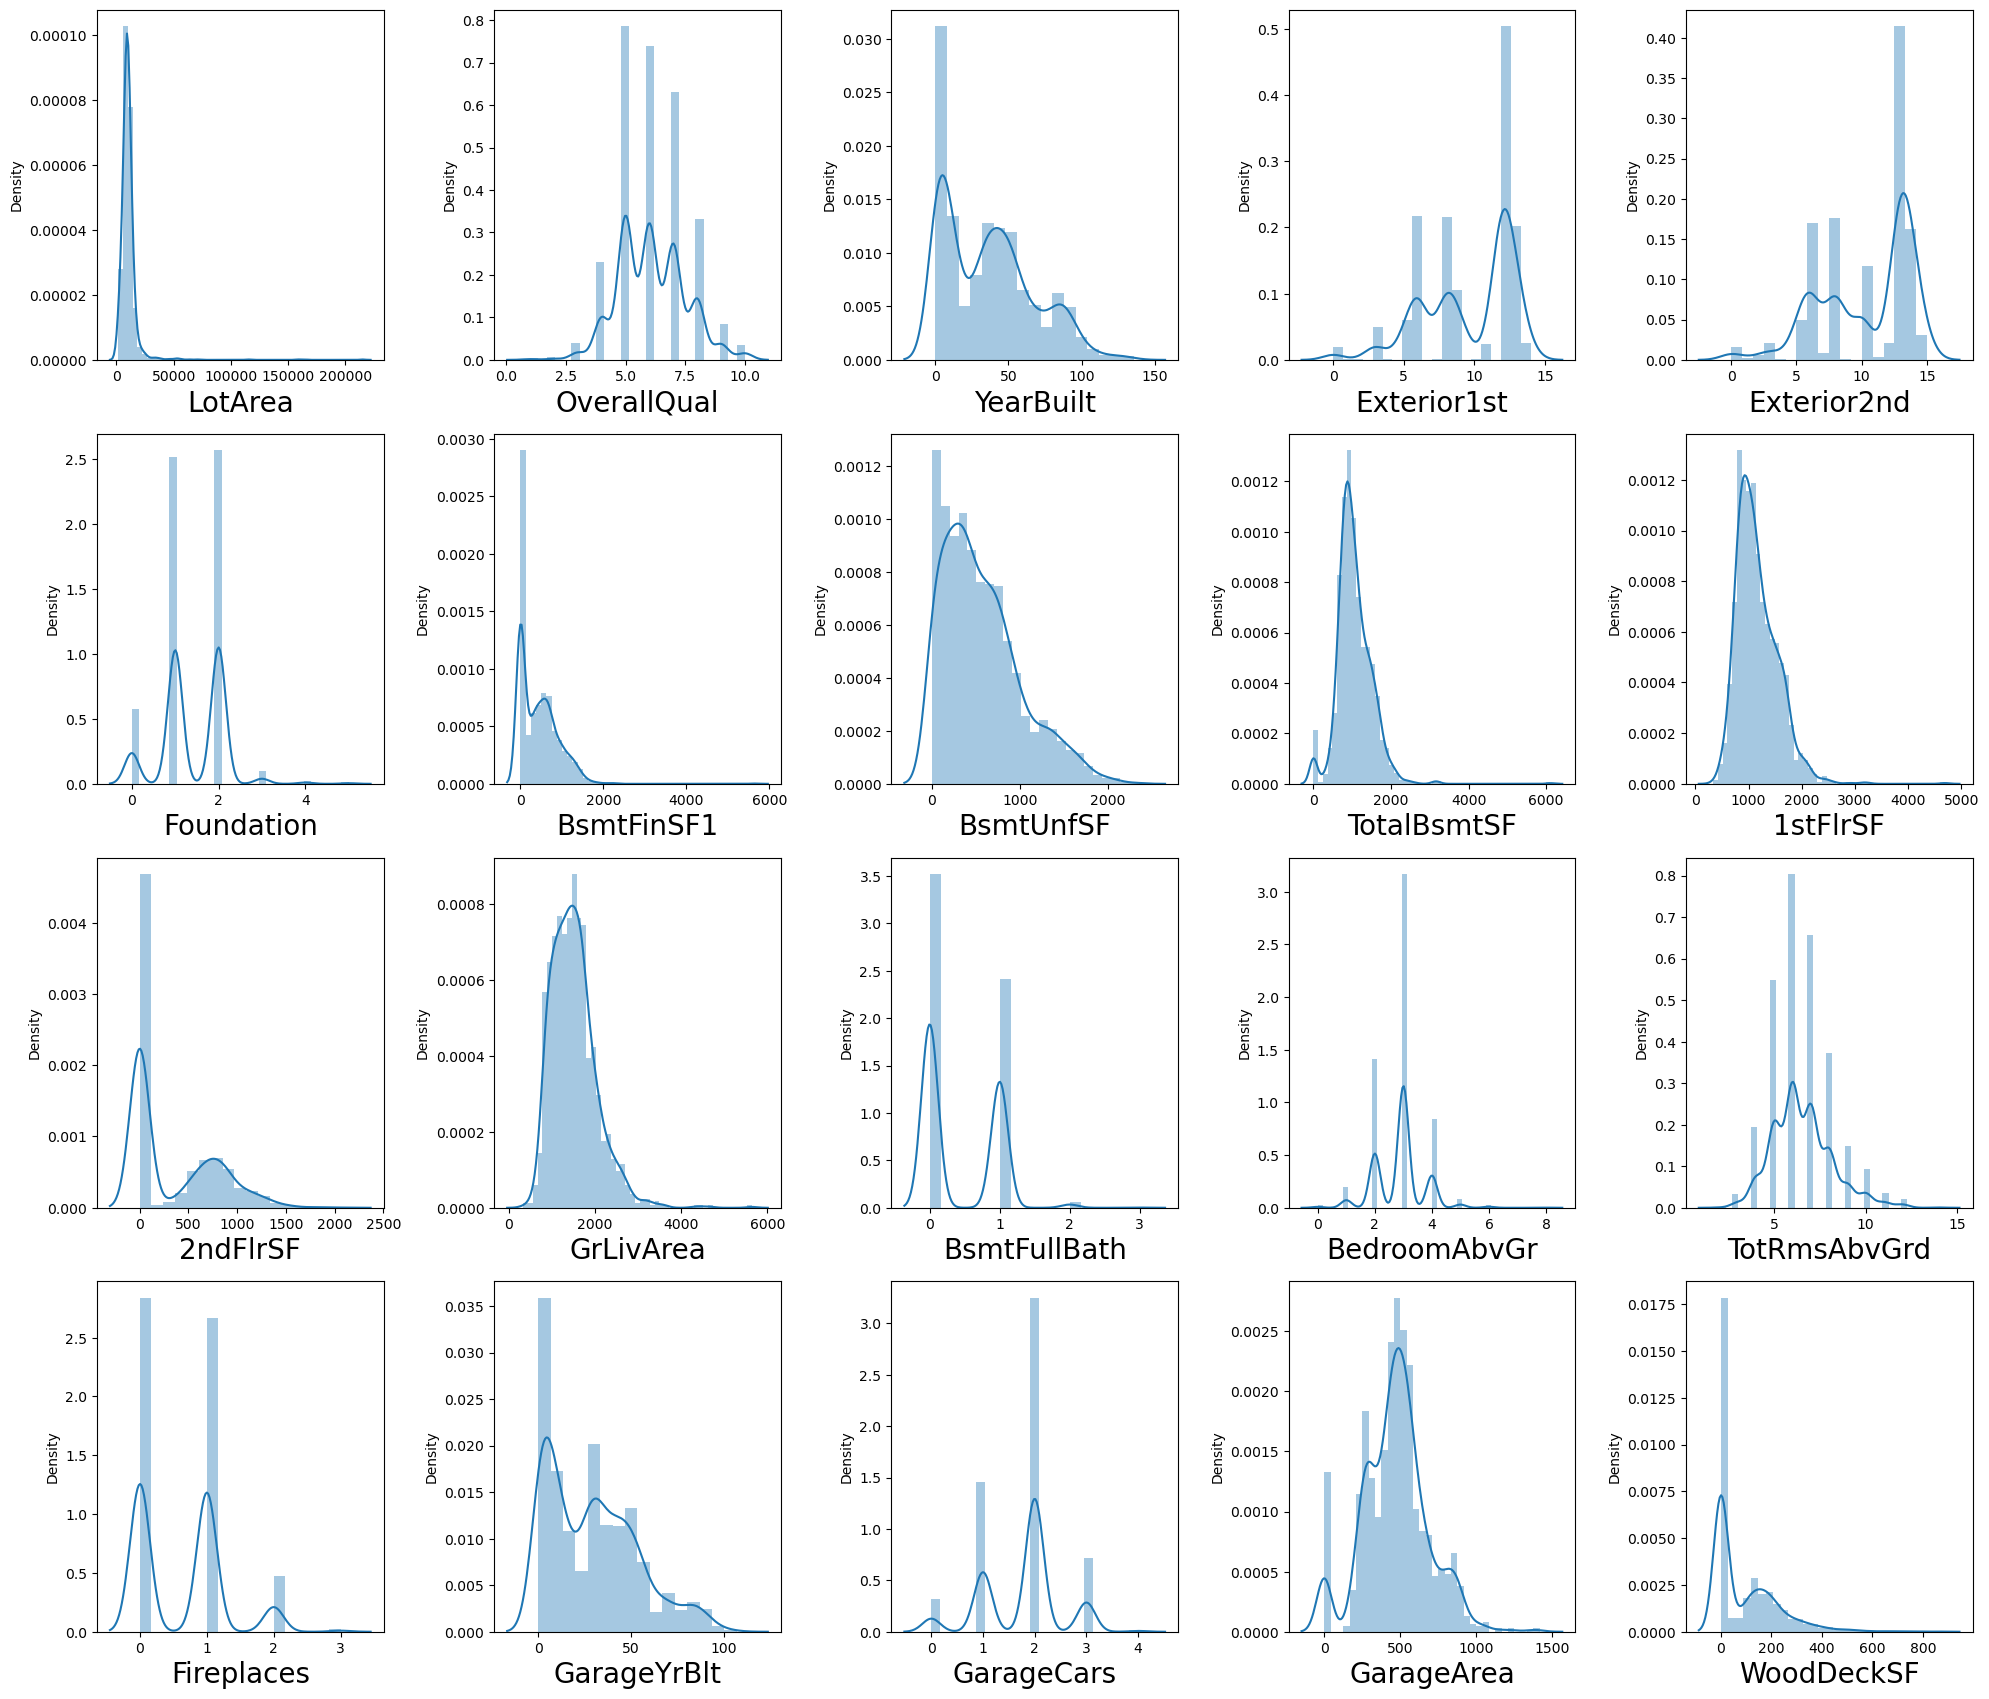

In [58]:
plt.figure(figsize=(20,25))
plotno = 1

for column in cols:
    if plotno<=25:
        plt.subplot(6,5,plotno)
        sns.distplot(x=cols[column])
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()

In [59]:
new_cols=data[['LotArea','YearBuilt','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF']]

In [60]:
# defining function to detect outliers 
def detect_outliers(column):
    q1=np.percentile(column,25)
    q3=np.percentile(column,75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers=column[(column<lower_bound)|(column>upper_bound)]
    return outliers

In [61]:
# imputing outliers if the outliers precent is less than 5% in data
for i in new_cols:
    outliers=detect_outliers(new_cols[i])
    percentage_outliers=(len(outliers)/len(new_cols))*100
    if percentage_outliers<5:
        data.loc[outliers.index, i] = new_cols[i].median()

### Scaling 

In [62]:
#cols=[x for x in data.columns if x not in ['Street','Utilities','Condition2','RoofMatl','LowQualFinSF','Heating','KitchenAbvGr','GarageQual','GarageCond','3SsnPorch','PoolArea','PoolQC''SalePrice','MiscFeature','MiscVal'] ]
out=[x for x in data.columns if x not in ['SalePrice']]
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
data_scaled=scaler.fit_transform(data[out])

In [63]:
data_scaled

array([[ 0.2       ,  0.        , -0.21052632, ...,  0.        ,
         0.        ,  0.        ],
       [-0.6       ,  0.        ,  0.57894737, ..., -0.5       ,
         0.        ,  0.        ],
       [ 0.2       ,  0.        , -0.05263158, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.4       ,  0.        , -0.15789474, ...,  1.        ,
         0.        ,  0.        ],
       [-0.6       ,  0.        , -0.05263158, ...,  1.        ,
         0.        ,  0.        ],
       [-0.6       ,  0.        ,  0.31578947, ...,  0.        ,
         0.        ,  0.        ]])

In [64]:
df=pd.concat([data[['SalePrice']].reset_index(drop=True),pd.DataFrame(data_scaled,columns=out)],axis=1)

In [65]:
df.head()

SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0     208500         0.2       0.0    -0.210526 -0.289943     0.0    0.0   
1     181500        -0.6       0.0     0.578947  0.034252     0.0    0.0   
2     223500         0.2       0.0    -0.052632  0.499401     0.0    0.0   
3     140000         0.4       0.0    -0.473684  0.020156     0.0    0.0   
4     250000         0.2       0.0     0.789474  1.347946     0.0    0.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0       0.0          0.0        0.0        0.0        0.0          -0.7   
1       0.0          0.0        0.0       -1.0        0.0           1.2   
2      -1.0          0.0        0.0        0.0        0.0          -0.7   
3      -1.0          0.0        0.0       -2.0        0.0          -0.6   
4      -1.0          0.0        0.0       -1.0        0.0           0.3   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         0.0         0.0       0.0         1.0          0.5          0.0   
1        -1.0         0.0       0.0         0.0          0.0          3.0   
2         0.0         0.0       0.0         1.0          0.5          0.0   
3         0.0         0.0       0.0         1.0          0.5          0.0   
4         0.0         0.0       0.0         1.0          1.0          0.0   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0  -0.652174     -0.243243        0.0       0.0         0.00          0.0   
1  -0.086957      0.459459        0.0       0.0        -1.00         -1.0   
2  -0.608696     -0.216216        0.0       0.0         0.00          0.0   
3   1.217391      0.594595        0.0       0.0         0.25          0.4   
4  -0.586957     -0.162162        0.0       0.0         0.00          0.0   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0        -1.0    1.193303        1.0        0.0         1.0       0.0   
1         0.0    0.000000        0.0        0.0         0.0       0.0   
2        -1.0    0.986301        1.0        0.0         1.0       0.0   
3         0.0    0.000000        0.0        0.0        -1.0      -1.0   
4        -1.0    2.130898        1.0        0.0         1.0       0.0   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0       0.0           0.0           0.4    0.459431           0.0         0.0   
1       0.0           3.0           0.2    0.846619           0.0         0.0   
2       0.0           1.0           0.4    0.146263           0.0         0.0   
3       1.0           0.0           0.2   -0.238078           0.0         0.0   
4       0.0           2.0           0.4    0.386833           0.0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0  -0.587416    -0.302118      0.0        0.0         0.0         0.0   
1  -0.346517     0.603122      0.0        0.0         0.0         0.0   
2  -0.076854    -0.159420      0.0        0.0         0.0         0.0   
3   0.113708    -0.525084      0.0       -0.5         0.0         0.0   
4   0.023820     0.342252      0.0        0.0         0.0         0.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.474280  1.173077           0.0   0.406276           1.0           0.0   
1  0.361111  0.000000           0.0  -0.333609           0.0           1.0   
2 -0.342593  1.189560           0.0   0.531792           1.0           0.0   
3 -0.258230  1.038462           0.0   0.417836           1.0           0.0   
4  0.120370  1.446429           0.0   1.212221           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0       0.0       1.0           0.0           0.0          1.0           1.0   
1       0.0       0.0           0.0           0.0          0.0           0.0   
2       0.0       1.0           0.0           0.0          1.0           0.0   
3      -1.0    

In [66]:
df.MiscFeature.value_counts()

 0.0    1406
 2.0      49
-1.0       2
 1.0       2
 3.0       1
Name: MiscFeature, dtype: int64


## Feature Engineering

In [67]:
pd.set_option("display.max_rows",None)
data.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.035900    -0.356718 -0.433101 -0.024969   
MSZoning         0.035900  1.000000    -0.105961 -0.085446  0.087654   
LotFrontage     -0.356718 -0.105961     1.000000  0.512149 -0.037349   
LotArea         -0.433101 -0.085446     0.512149  1.000000 -0.006064   
Street          -0.024969  0.087654    -0.037349 -0.006064  1.000000   
Alley            0.099430 -0.368086    -0.065084 -0.104695 -0.001587   
LotShape         0.119289  0.061887    -0.138877 -0.293777 -0.010224   
LandContour     -0.002940 -0.017854    -0.076080  0.025698  0.115995   
Utilities       -0.022844 -0.001192    -0.001027  0.042741  0.001682   
LotConfig        0.075910 -0.009895    -0.177821 -0.183391  0.013960   
LandSlope       -0.025672 -0.022055     0.065603  0.023537 -0.179360   
Neighborhood    -0.005985 -0.249679     0.084901  0.132239 -0.011561   
Condition1      -0.024762 -0.027874    -0.009341  0.079173 -0.071657   
Condition2      -0.042395  0.044606     0.002599  0.007597  0.002039   
BldgType         0.746063  0.005690    -0.408013 -0.529633 -0.018243   
HouseStyle       0.397161 -0.105315     0.030567  0.017684  0.023704   
OverallQual      0.032628 -0.160099     0.234812  0.234918  0.058823   
OverallCond     -0.059316  0.186951    -0.053281 -0.020635  0.042848   
YearBuilt       -0.040043  0.292553    -0.120835 -0.107958 -0.023926   
YearRemodAdd    -0.041968  0.173441    -0.082957 -0.075585 -0.067091   
RoofStyle       -0.117817 -0.000301     0.153999  0.140367 -0.019732   
RoofMatl        -0.031336  0.005133     0.081277  0.052787  0.008081   
Exterior1st     -0.089159 -0.008558     0.075455  0.090029  0.002505   
Exterior2nd     -0.137229  0.006963     0.099515  0.099880  0.006166   
MasVnrType      -0.029850 -0.028279    -0.017693 -0.026225  0.010007   
MasVnrArea       0.023573 -0.062830     0.178469  0.140624  0.017108   
ExterQual        0.016178 -0.195689     0.165567  0.157387  0.100247   
ExterCond       -0.064686  0.091101    -0.016430  0.030059 -0.015212   
Foundation       0.058126 -0.235174     0.098418  0.062116  0.035277   
BsmtQual         0.076820 -0.209086     0.164071  0.150706  0.021961   
BsmtCond        -0.005152 -0.051366     0.045131  0.024299  0.002478   
BsmtExposure     0.054925 -0.016238     0.161535  0.154882 -0.093411   
BsmtFinType1     0.029052 -0.092173     0.071764  0.051896  0.017728   
BsmtFinSF1      -0.067503 -0.051844     0.111567  0.174015 -0.018433   
BsmtFinType2    -0.022856  0.045532     0.014036  0.030645 -0.078310   
BsmtFinSF2      -0.065649  0.028086     0.042463  0.058005 -0.038487   
BsmtUnfSF       -0.121484 -0.048375     0.088239  0.054740  0.034405   
TotalBsmtSF     -0.255661 -0.103519     0.259410  0.330365  0.006420   
Heating          0.048009  0.056866    -0.020325 -0.024008  0.007904   
HeatingQC       -0.019458 -0.162866     0.090051  0.076571  0.043211   
CentralAir      -0.101774 -0.049523     0.067350  0.088667  0.069869   
Electrical       0.051945 -0.070818     0.059572  0.041668  0.021324   
1stFlrSF        -0.247982 -0.059990     0.340631  0.397362  0.002914   
2ndFlrSF         0.310261 -0.051671     0.055068  0.088781  0.047014   
LowQualFinSF     0.046474  0.011520     0.037469 -0.018666  0.007724   
GrLivArea        0.073900 -0.105432     0.267317  0.365683  0.046458   
BsmtFullBath     0.003491 -0.018526     0.090343  0.080963 -0.050524   
BsmtHalfBath    -0.002333  0.007193    -0.006979  0.031829  0.015485   
FullBath         0.131608 -0.198290     0.180534  0.203050  0.046471   
HalfBath         0.177354 -0.133876     0.047222  0.096056  0.027628   
BedroomAbvGr    -0.023438 -0.016471     0.236840  0.294731  0.028865   
KitchenAbvGr     0.281721  0.049434    -0.004905 -0.021169  0.013583   
KitchenQual     -0.012383 -0.160914     0.169829  0.164292  0.065669   
TotRmsAbvGrd     0.040380 -0.043200     0.320518  0.374778  0.046828   
Functional       0.003711 -0.095722     0.030114  0.020

In [68]:
#df.drop(['Street','Utilities','Condition2','RoofMatl','LowQualFinSF','Heating','KitchenAbvGr','GarageQual','GarageCond','3SsnPorch','PoolArea','PoolQC'],axis=1,inplace=True)

In [69]:
df.corr()

SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  \
SalePrice       1.000000   -0.084284 -0.166872     0.334771  0.403007   
MSSubClass     -0.084284    1.000000  0.035900    -0.356718 -0.433101   
MSZoning       -0.166872    0.035900  1.000000    -0.105961 -0.085446   
LotFrontage     0.334771   -0.356718 -0.105961     1.000000  0.512149   
LotArea         0.403007   -0.433101 -0.085446     0.512149  1.000000   
Street          0.041036   -0.024969  0.087654    -0.037349 -0.006064   
Alley           0.083121    0.099430 -0.368086    -0.065084 -0.104695   
LotShape       -0.255580    0.119289  0.061887    -0.138877 -0.293777   
LandContour     0.015453   -0.002940 -0.017854    -0.076080  0.025698   
Utilities      -0.014314   -0.022844 -0.001192    -0.001027  0.042741   
LotConfig      -0.067396    0.075910 -0.009895    -0.177821 -0.183391   
LandSlope       0.051152   -0.025672 -0.022055     0.065603  0.023537   
Neighborhood    0.210851   -0.005985 -0.249679     0.084901  0.132239   
Condition1      0.091155   -0.024762 -0.027874    -0.009341  0.079173   
Condition2      0.007513   -0.042395  0.044606     0.002599  0.007597   
BldgType       -0.085591    0.746063  0.005690    -0.408013 -0.529633   
HouseStyle      0.180163    0.397161 -0.105315     0.030567  0.017684   
OverallQual     0.790982    0.032628 -0.160099     0.234812  0.234918   
OverallCond    -0.077856   -0.059316  0.186951    -0.053281 -0.020635   
YearBuilt      -0.533479   -0.040043  0.292553    -0.120835 -0.107958   
YearRemodAdd   -0.509079   -0.041968  0.173441    -0.082957 -0.075585   
RoofStyle       0.222405   -0.117817 -0.000301     0.153999  0.140367   
RoofMatl        0.132383   -0.031336  0.005133     0.081277  0.052787   
Exterior1st     0.103551   -0.089159 -0.008558     0.075455  0.090029   
Exterior2nd     0.103766   -0.137229  0.006963     0.099515  0.099880   
MasVnrType      0.018216   -0.029850 -0.028279    -0.017693 -0.026225   
MasVnrArea      0.472614    0.023573 -0.062830     0.178469  0.140624   
ExterQual       0.682639    0.016178 -0.195689     0.165567  0.157387   
ExterCond       0.018899   -0.064686  0.091101    -0.016430  0.030059   
Foundation      0.382479    0.058126 -0.235174     0.098418  0.062116   
BsmtQual        0.650138    0.076820 -0.209086     0.164071  0.150706   
BsmtCond        0.159445   -0.005152 -0.051366     0.045131  0.024299   
BsmtExposure    0.361863    0.054925 -0.016238     0.161535  0.154882   
BsmtFinType1    0.298771    0.029052 -0.092173     0.071764  0.051896   
BsmtFinSF1      0.365283   -0.067503 -0.051844     0.111567  0.174015   
BsmtFinType2   -0.032060   -0.022856  0.045532     0.014036  0.030645   
BsmtFinSF2     -0.011378   -0.065649  0.028086     0.042463  0.058005   
BsmtUnfSF       0.123422   -0.121484 -0.048375     0.088239  0.054740   
TotalBsmtSF     0.543235   -0.255661 -0.103519     0.259410  0.330365   
Heating        -0.098812    0.048009  0.056866    -0.020325 -0.024008   
HeatingQC       0.427649   -0.019458 -0.162866     0.090051  0.076571   
CentralAir      0.251328   -0.101774 -0.049523     0.067350  0.088667   
Electrical      0.234945    0.051945 -0.070818     0.059572  0.041668   
1stFlrSF        0.558633   -0.247982 -0.059990     0.340631  0.397362   
2ndFlrSF        0.277603    0.310261 -0.051671     0.055068  0.088781   
LowQualFinSF   -0.025606    0.046474  0.011520     0.037469 -0.018666   
GrLivArea       0.616246    0.073900 -0.105432     0.267317  0.365683   
BsmtFullBath    0.227122    0.003491 -0.018526     0.090343  0.080963   
BsmtHalfBath   -0.016844   -0.002333  0.007193    -0.006979  0.031829   
FullBath        0.560664    0.131608 -0.198290     0.180534  0.203050   
HalfBath        0.284108    0.177354 -0.133876     0.047222  0.096056   
BedroomAbvGr    0.168213   -0.023438 -0.016471     0.236840  0.294731   
KitchenAbvGr   -0.135907    0.281721  0.049434    -0.004905 -0.021169   
KitchenQual     0.659600   -0.012383 -0.160914     0.169829  0.164292   


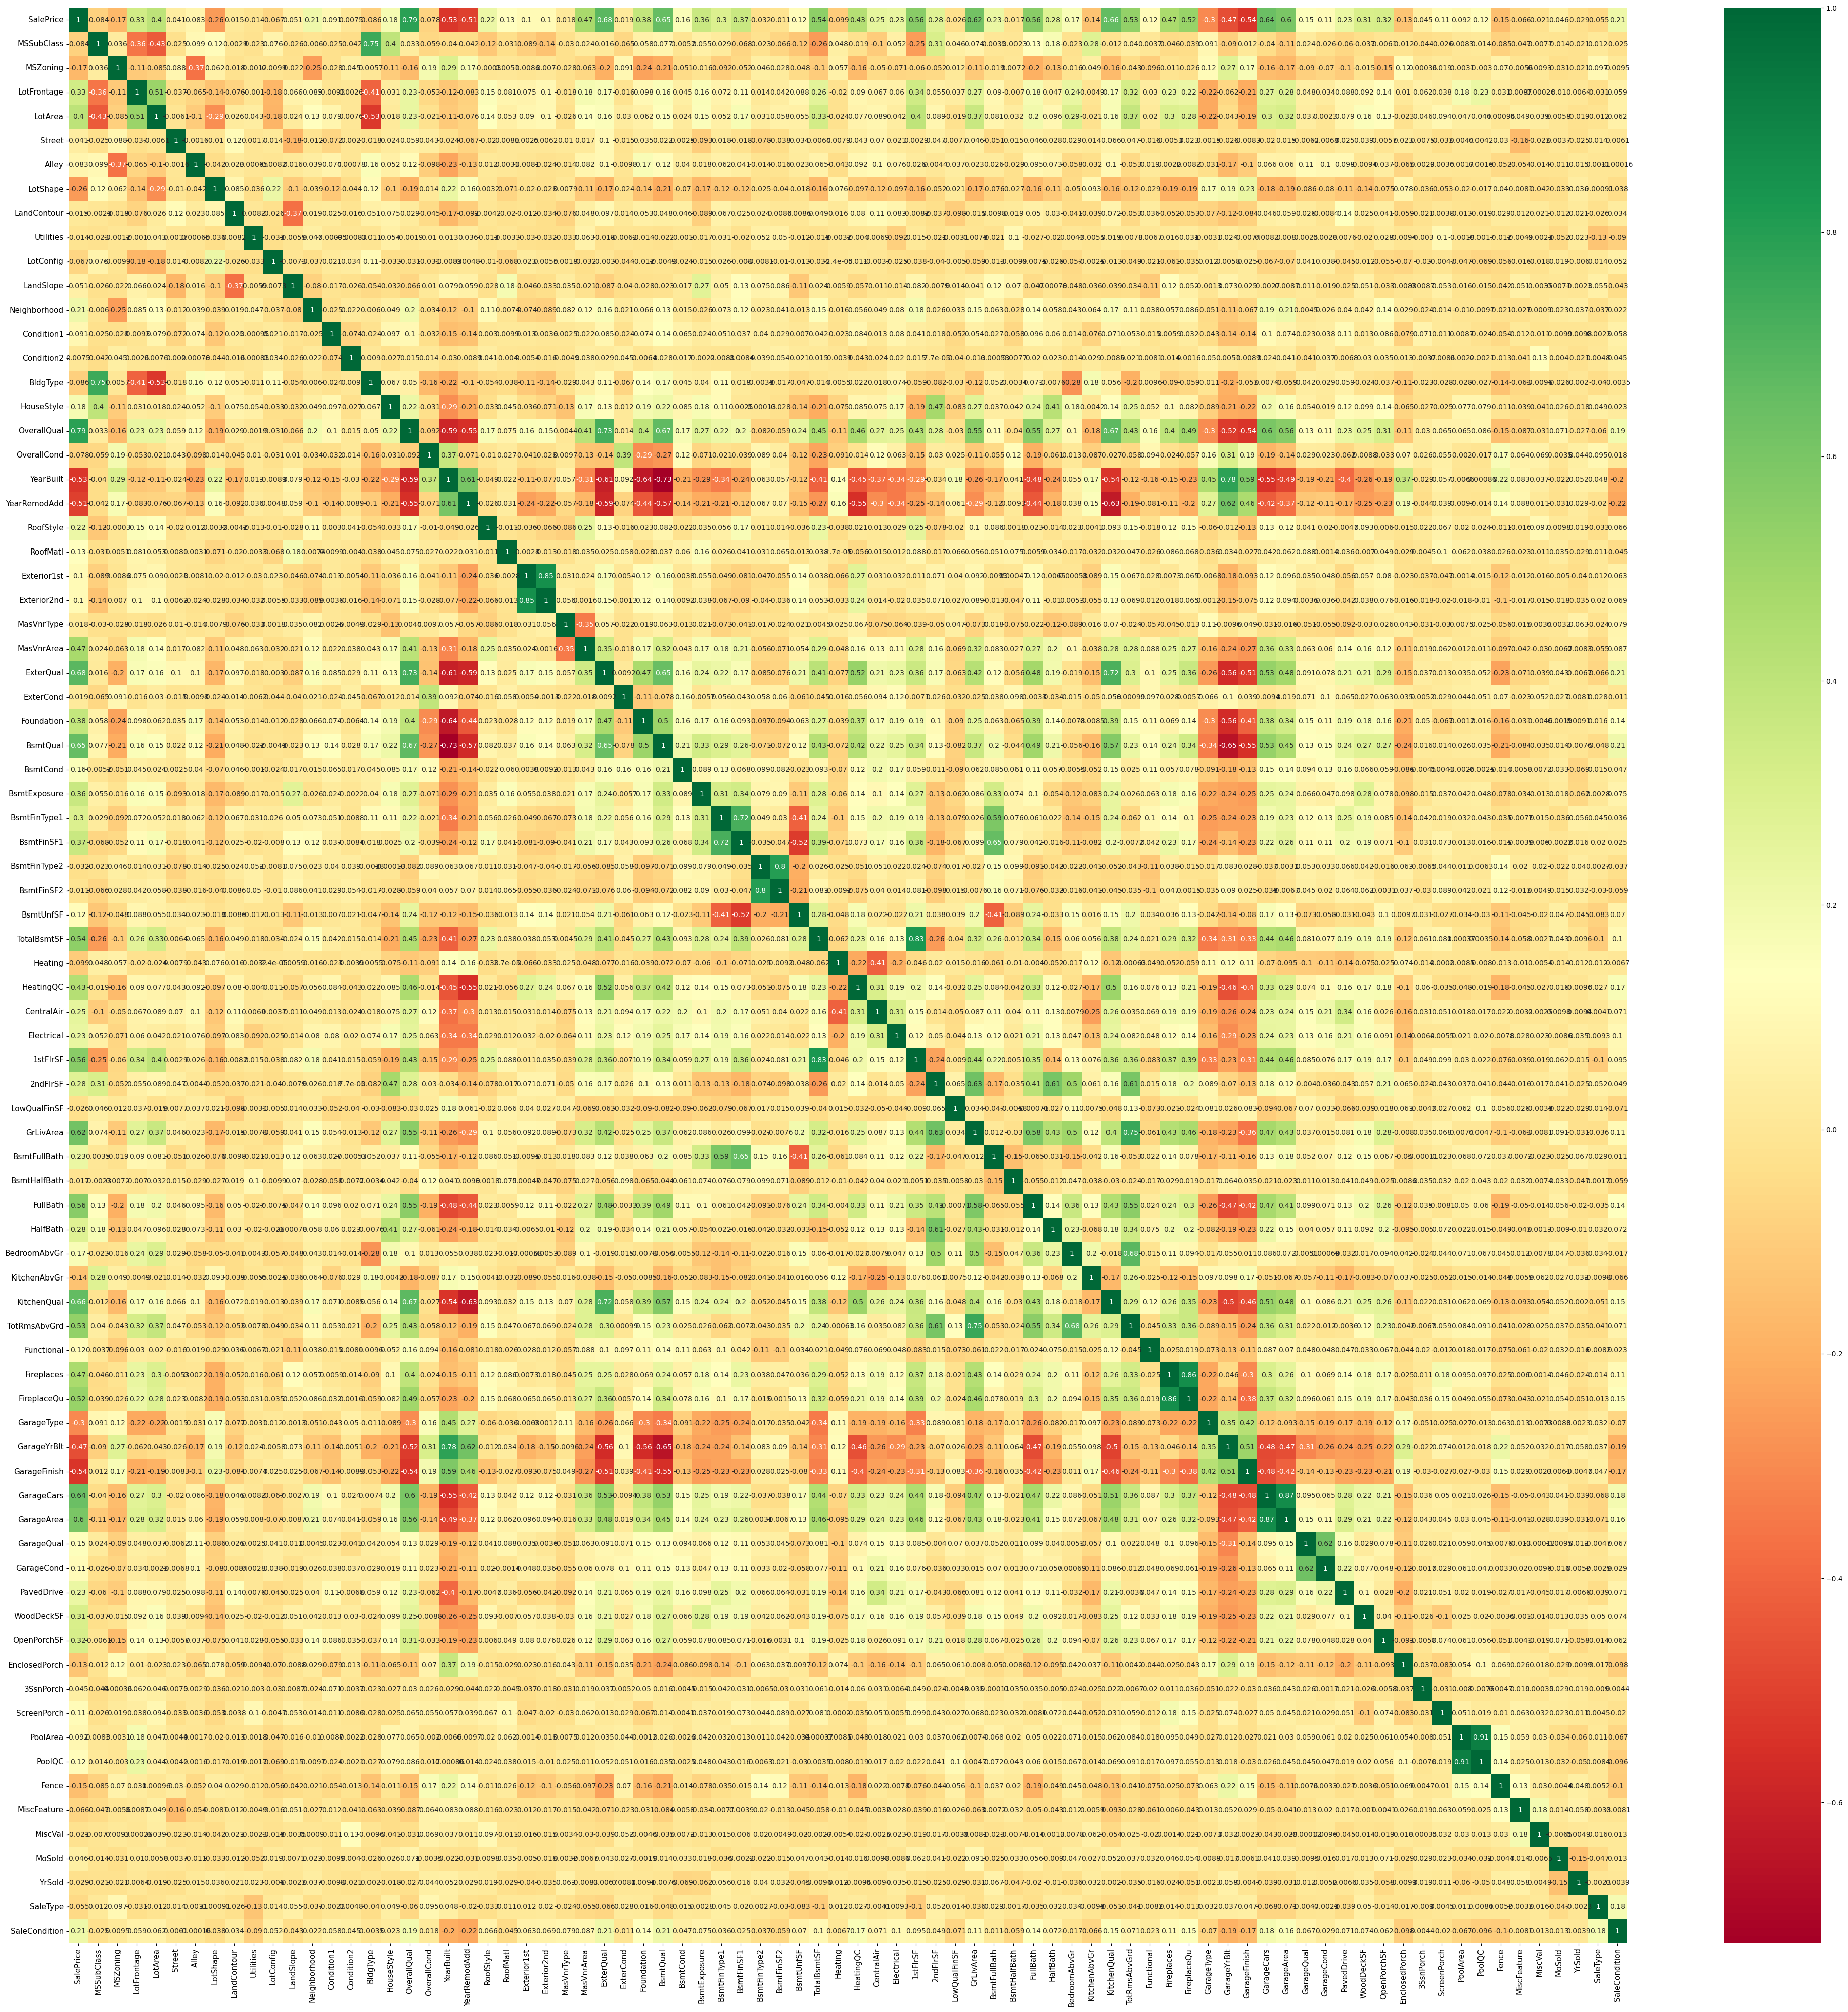

In [70]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")
plt.tick_params(labelsize=11)

In [71]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [72]:
corr_features=correlation(df,0.9)
len(set(corr_features))

1

In [73]:
corr_features

{'PoolQC'}

In [74]:
df.drop('PoolQC',axis=1,inplace=True)

## Model Creation

In [75]:
# for model cvreation we need to split the data 
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [77]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 78)
(292, 78)
(1168,)
(292,)


## Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [79]:
y_pred=lr.predict(x_test)

In [80]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [81]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)


899097638.2513347
20945.01460760532


In [82]:
import math
rmse=math.sqrt(mae)
print(rmse)

144.72392548436946


In [83]:
lr_score=r2_score(y_test,y_pred)
lr_score

0.8618299504785568

In [84]:
# adjusted r2 score
adj_r2=1-(1-lr_score)*(2671-1)/(2671-13-1)
adj_r2

0.8611539208798444

In [85]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr, x, y, cv=5, scoring='r2')


In [86]:
print("Cross-Validation mean:", cv_scores.mean())
print("Cross-Validation Standard Deviation :", cv_scores.std())

Cross-Validation mean: 0.8100334337045758
Cross-Validation Standard Deviation : 0.03974382919709974


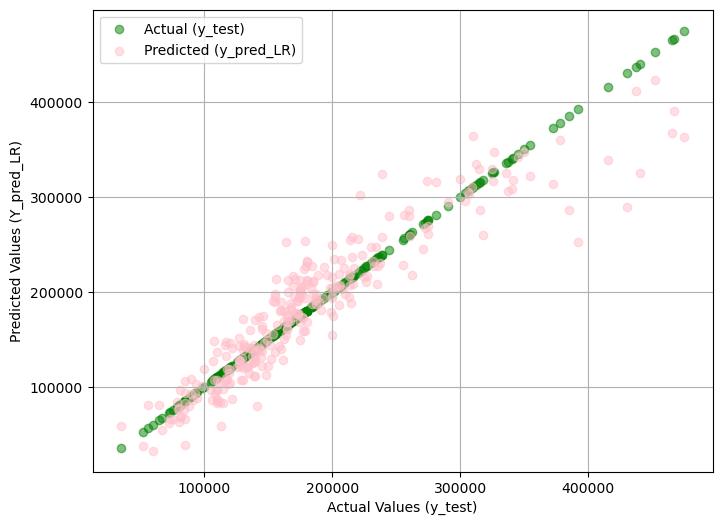

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,c='green',marker='o',alpha=0.5,label='Actual (y_test)')
plt.scatter(y_test,y_pred,c='pink',marker='o',alpha=0.5,label= 'Predicted (y_pred_LR)')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (Y_pred_LR)')
plt.legend()
plt.grid(True)
plt.show()

## Lasso

In [88]:
from sklearn.linear_model import Lasso

In [89]:
las=Lasso()
las.fit(x_train,y_train)
y_pred=las.predict(x_test)

In [90]:
las_score=r2_score(y_test,y_pred)
las_score

0.8618479055409761

In [91]:
cv_scores = cross_val_score(las, x, y, cv=5, scoring='r2')
print("Cross-Validation mean:", cv_scores.mean())
print("Cross-Validation Standard Deviation of MSE:", cv_scores.std())

Cross-Validation mean: 0.8100845065658027
Cross-Validation Standard Deviation of MSE: 0.039756796491673616


## KNN

In [92]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=6)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [93]:
y_pred=knn.predict(x_test)

In [94]:
knn_score=r2_score(y_test,y_pred)
knn_score

0.5904641514294572

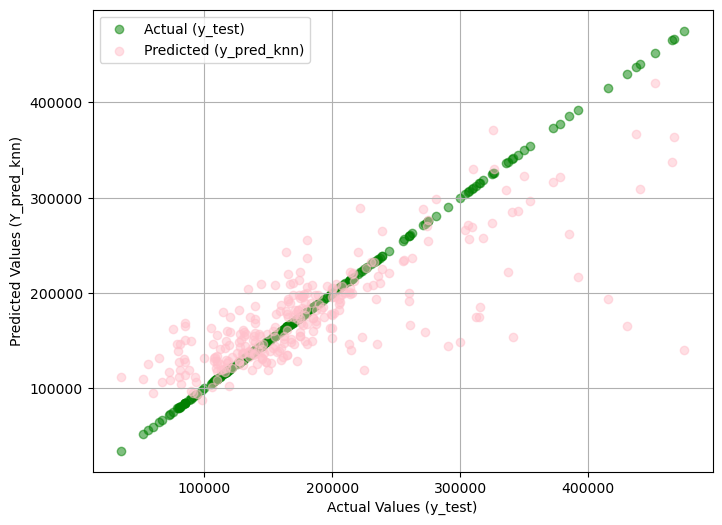

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,c='green',marker='o',alpha=0.5,label='Actual (y_test)')
plt.scatter(y_test,y_pred,c='pink',marker='o',alpha=0.5,label= 'Predicted (y_pred_knn)')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (Y_pred_knn)')
plt.legend()
plt.grid(True)
plt.show()

## SVM

In [96]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)

In [97]:
svr_score=r2_score(y_test,y_pred)
svr_score

-0.07189576625548977

In [ ]:
from sklearn.model_selection import GridSearchCV
# Defining Hyper parameter
param_grid = {'C':[0.001,0.01,0.1,1,10,30,50,70],'kernel':['linear'],'epsilon':[0.01,0.1,0.2,0.5,1]}
model = SVR()
grid = GridSearchCV(model,param_grid,scoring='r2',verbose=2,cv=5)

# fitting the model for grid search
grid.fit(x,y)

In [ ]:
print(grid.best_params_)

In [98]:
model_svr=SVR(C= 70, epsilon= 0.01, kernel= 'linear')
model_svr.fit(x_train,y_train)

SVR(C=70, epsilon=0.01, kernel='linear')

In [99]:
y_pred_svr=model_svr.predict(x_test)

In [125]:
score2=r2_score(y_test,y_pred_svr)
score

0.8916681844122517

In [101]:
cv_scores = cross_val_score(model_svr, x, y, cv=5, scoring='r2')
print("Cross-Validation mean:", cv_scores.mean())
print("Cross-Validation Standard Deviation :", cv_scores.std())

Cross-Validation mean: 0.7659674912613231
Cross-Validation Standard Deviation : 0.04476346433433143


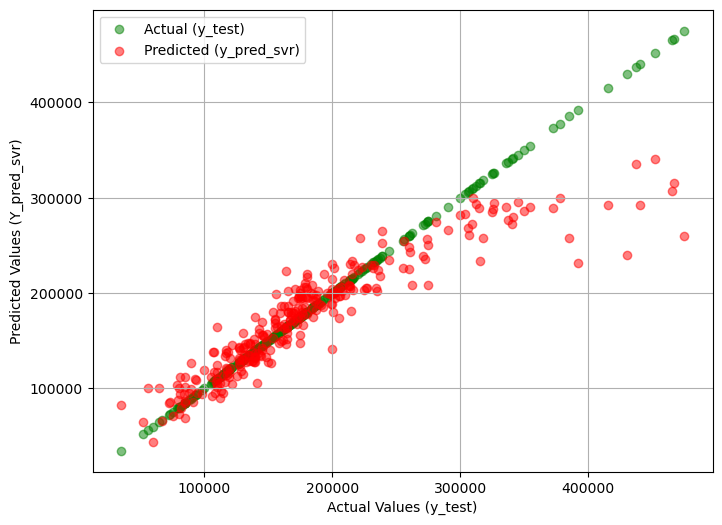

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,c='green',marker='o',alpha=0.5,label='Actual (y_test)')
plt.scatter(y_test,y_pred_svr,c='red',marker='o',alpha=0.5,label= 'Predicted (y_pred_svr)')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (Y_pred_svr)')
plt.legend()
plt.grid(True)
plt.show()

## Decision Tree

In [103]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [104]:
y_pred=dt.predict(x_test)

In [105]:
dt_score=r2_score(y_test,y_pred)
dt_score

0.7669011959236485

In [106]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)


1516816306.791096
26750.174657534248


## Random Forest

In [107]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
model_RFR = RFR.fit(x_train,y_train)
model_RFR

RandomForestRegressor()

In [108]:
y_pred_RFR = model_RFR.predict(x_test)

In [109]:
rf_score=r2_score(y_test,y_pred_RFR)
rf_score

0.8945329116488908

In [110]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200,stop=2000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start = 10,stop=100,num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [3,5,4]
bootstrap=[True,False]

In [ ]:
random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
rfr_ht = RandomForestRegressor(random_state=40)
rfr_cv = RandomizedSearchCV(estimator=RFR,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                           random_state=32,n_jobs=-1,scoring='r2')
rfr_cv.fit(x,y)


In [ ]:
rf_best_params = rfr_cv.best_params_
print(f"best_params:{rf_best_params}")

In [111]:
rfr1 = RandomForestRegressor(n_estimators=400,max_features='sqrt',min_samples_split= 2, min_samples_leaf=3,
                            max_depth= None, bootstrap=False)
rfr1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=3,
                      n_estimators=400)

In [112]:
y_pred_rf=rfr1.predict(x_test)

In [113]:
rf1_score=r2_score(y_test,y_pred_rf)
rf1_score

0.8853777023999088

## Gradient boosting

In [114]:
from xgboost import XGBRegressor

In [115]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [116]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)


712525489.4039658
17240.81383775685


In [117]:
score=r2_score(y_test,y_pred)
score

0.8905016786077735

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

xgb1=XGBRegressor(random_state=42,verbosity=0,silent=0)
rcv1= RandomizedSearchCV(estimator=xgb1, scoring='r2',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                
rcv1.fit(x_train, y_train)
rcv1_best_params = rcv1.best_params_
print(f"Best paramters: {rcv1_best_params})")

In [118]:
xgb2=XGBRegressor(reg_lambda=12.8, reg_alpha= 0.1, n_estimators=150, max_depth=5, learning_rate=0.1, gamma=0.8)
xgb2.fit(x_train, y_train)
y_pred_xgb2=xgb2.predict(x_test)

In [122]:
score1=r2_score(y_test,y_pred_xgb2)
score

0.8916681844122517

# RESULT

###  Comparison of the Best Models Evaluated 

In [126]:
scores = [lr_score,las_score,knn_score,score2,dt_score,rf1_score,score1]
algorithms = ["Linear Regression","Lasso","KNN","SVR","Decision Tree","Random␣Forest","XGBoosting"]
for i in range(len(algorithms)):
  print("The R2 score achieved using "+algorithms[i]+" is: "+str(scores[i])+"%")

The R2 score achieved using Linear Regression is: 0.8618299504785568%
The R2 score achieved using Lasso is: 0.8618479055409761%
The R2 score achieved using KNN is: 0.5904641514294572%
The R2 score achieved using SVR is: 0.7996454250490209%
The R2 score achieved using Decision Tree is: 0.7669011959236485%
The R2 score achieved using Random␣Forest is: 0.8853777023999088%
The R2 score achieved using XGBoosting is: 0.8916681844122517%


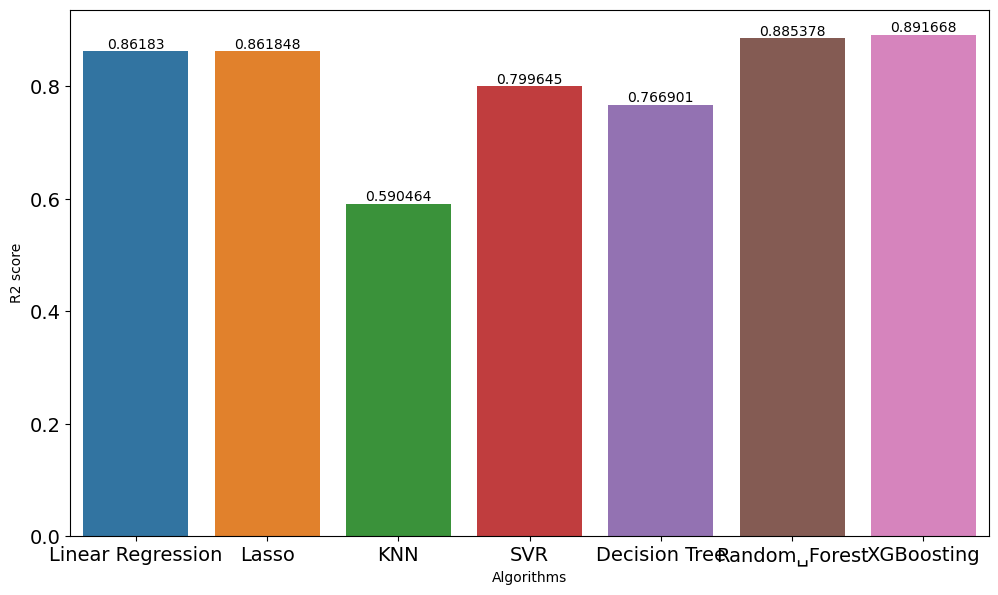

In [127]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("R2 score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
  ax.bar_label(label)
  plt.tight_layout()
  plt.tick_params(labelsize=14)

# Conclusion

• The best model is XGBOOST with a r2_score of 0.891.

• The second best model followed by XGBOOST is Random Forest with a r2_score of 0.885.